# Edunet foundation

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The first step to any kind of exploration and modelling requires us to load the data file into the environment.
The .read_csv() function helps us.

In [3]:
full_data = pd.read_csv('C:/Users/rampa/Downloads/archive (20)/faults.csv')

In [4]:
# Let's Check the dimensions of this data
print(full_data.shape)
print("Number of rows: "+str(full_data.shape[0]))
print("Number of columns: "+str(full_data.shape[1]))

(1941, 28)
Number of rows: 1941
Number of columns: 28


In [ ]:
# Exploratory Data Analysis - EDA
full_data.head()

To understand the data better that we are going to deal with we would like to have a look at the basic numerical stats of the data like the mean, maximum etc. columnwise.
The .describe() function helps us.

In [ ]:
# We can check the name of all columns in the dataset using the .columns property
full_data.columns

In [ ]:
full_data.describe().T

In [ ]:
One of the first steps is to gather all possible information about the data and understand the problem statement that we are going to target with the data.

#### Data Visualisation
Since this is a classification problem it would be important and interesting to the distribution of target variables for the data.

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='target', data=full_data, ax=ax[0])
_ = full_data['target'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

So there are 7 classes of faults in the steel. We can see that the distribution of the classes is greatly disbalanced. 'Other_Faults' class is in majority while 'Dirtiness' class is the minority here.

In [ ]:
# Let's check the distribution of data using Histogram and Density visualisation method.
full_data.hist(figsize=(15,15))
plt.show()

In [ ]:
full_data.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

Among the various questions that arise, one crucial question is to ask whether the data contains any missing values? Lets see how we can find the answer to that.

In [ ]:
full_data.isnull().sum()

In [ ]:
# Data Preprocessing
full_data.X_Maximum.fillna(full_data.X_Maximum.median(),inplace=True)
full_data.Steel_Plate_Thickness.fillna(full_data.Steel_Plate_Thickness.median(),inplace=True)
full_data.Empty_Index.fillna(np.mean(full_data.Empty_Index),inplace=True)

In [ ]:
full_data.isnull().sum()

In [ ]:
def draw_univariate_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(30,35))

    counter=0
    
    for i in range(rows):
        for j in range(cols):

            if column_names[counter]=='target':
                break
            if 'violin' in plot_type:
                sns.violinplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                #sns.boxplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
                sns.boxplot(x=None, y=column_names[counter],data=dataset, ax=axarr[i][j])

            counter += 1
            if counter==(number_of_column-1,):
                break

In [ ]:
draw_univariate_plot(dataset=full_data, rows=7, cols=4,plot_type="box")

As we can see the target variable has text values as the name of classes. When a machine learning algorithm takes input it expects all values to be numerical and can not handle text values directly. It will simply throw an error if text value is fed to the model. Hence we need to replace text value with a number that can represent the class. Label Encoder tool helps us perform the same.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=full_data.drop('target',axis=1)
Y=le.fit_transform(full_data['target'])

In [ ]:
le.classes_

In [ ]:
le.inverse_transform([0,1,2,3,4,5,6])

In [ ]:
dict(zip(le.inverse_transform([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3,random_state = 42)

In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

In [ ]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

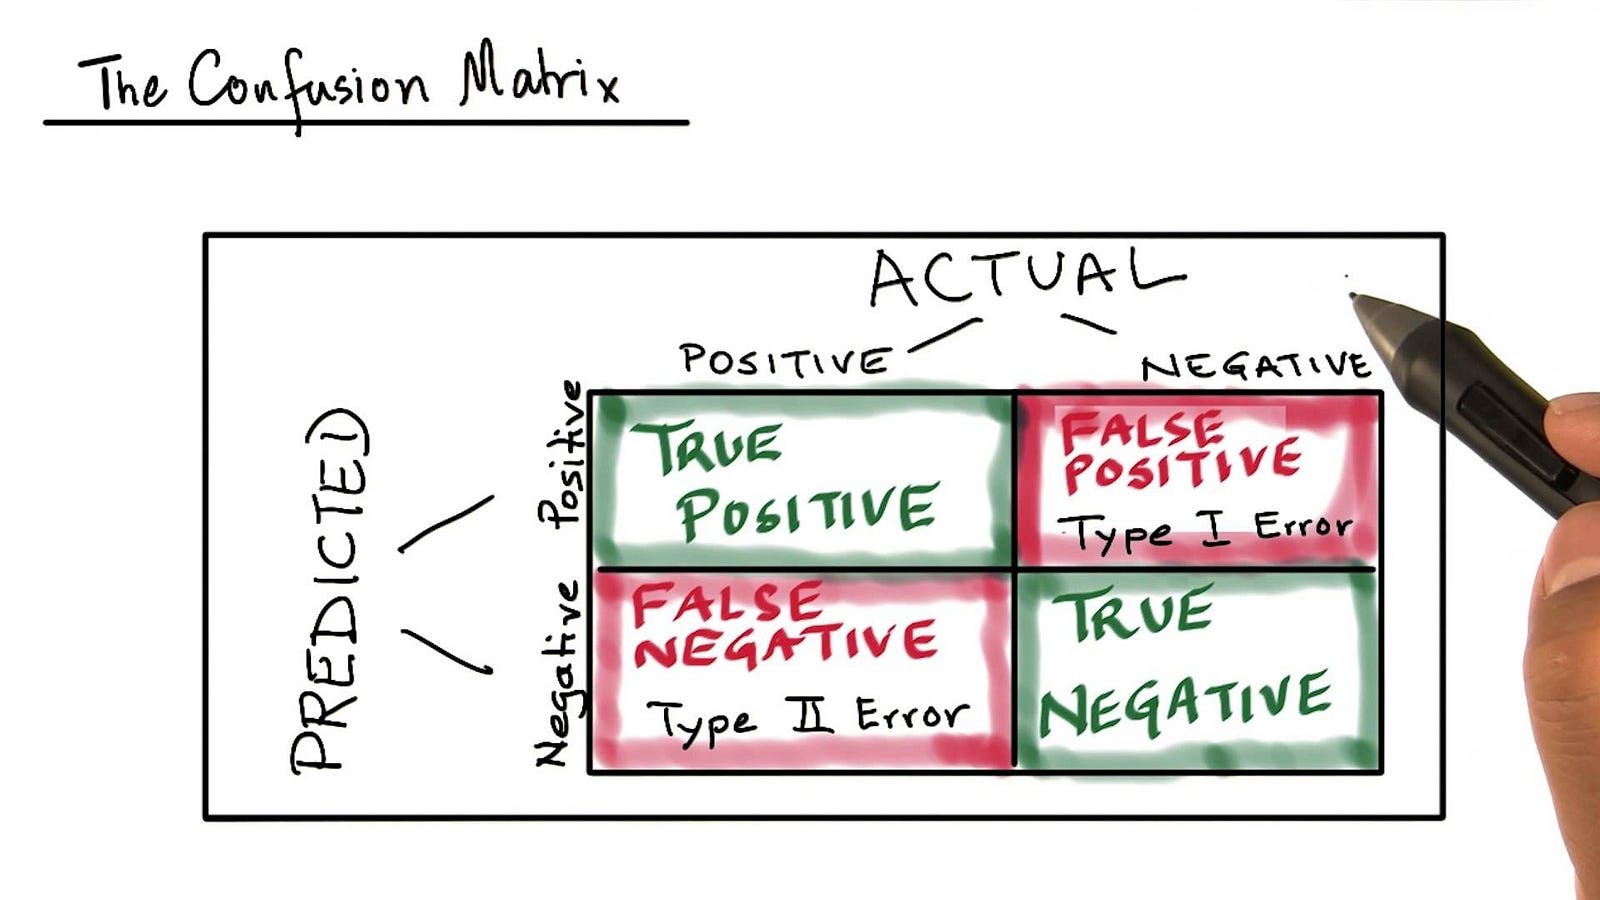

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 1,min_samples_split= 2)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

In [ ]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)